In [8]:
import pandas as pd

# Membaca file CSV yang telah diunggah pengguna
file_path = '/content/CreditDataset.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset untuk melihat strukturnya
data.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


**Insight :**
Dataset yang ditampilkan terdiri dari 21 kolom dengan campuran data kategorikal (seperti "A11", "A34", dll.) dan numerik (seperti "6", "67"), serta target pada kolom "Class" yang tampaknya menjadi variabel klasifikasi.

Metrik Evaluasi Model SVM Klasifikasi:
       Accuracy  Precision  Recall  F1-Score       AUC
Value      0.78   0.769567    0.78  0.762752  0.821253


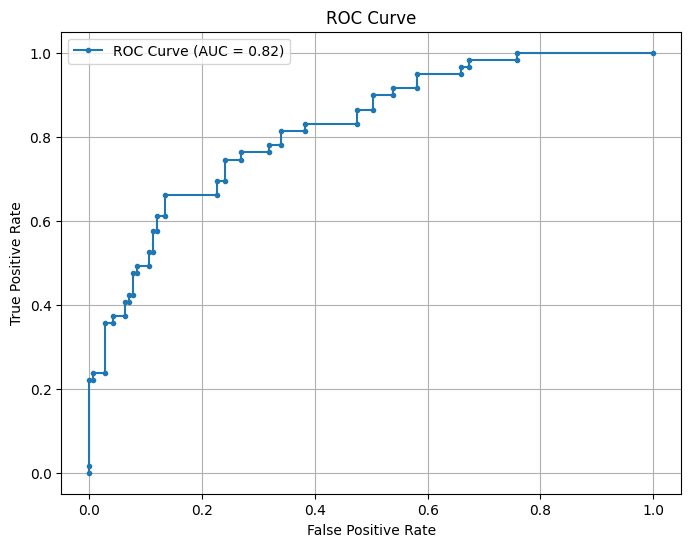

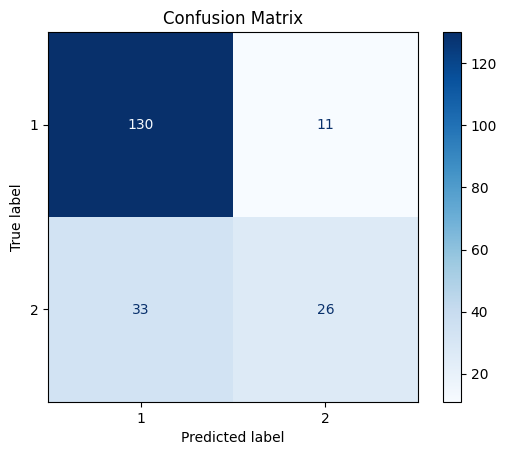


Metrik evaluasi juga telah disimpan ke file 'svm_classification_metrics.csv'.


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1. Mengidentifikasi kolom kategorikal untuk encoding
categorical_columns = data.select_dtypes(include=['object']).columns

# Menggunakan LabelEncoder untuk mengubah kolom kategorikal menjadi numerik
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Menyimpan encoder untuk referensi

# 2. Memisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)  # 'Class' dianggap sebagai target
y = data['Class']

# 3. Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standarisasi data untuk SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Membuat dan melatih model SVM Classifier
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)  # Menggunakan kernel RBF dan mengaktifkan probabilitas
svm_classifier.fit(X_train_scaled, y_train)

# 6. Melakukan prediksi
y_pred = svm_classifier.predict(X_test_scaled)
y_pred_prob = svm_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilitas untuk kelas positif

# 7. Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score((y_test > 1).astype(int), y_pred_prob)  # AUC untuk klasifikasi biner

# Menyusun metrik evaluasi ke dalam DataFrame
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
}
evaluation_df = pd.DataFrame(evaluation_metrics, index=["Value"])

# Menampilkan metrik evaluasi ke terminal
print("Metrik Evaluasi Model SVM Klasifikasi:")
print(evaluation_df)

# Membuat ROC Curve untuk klasifikasi
fpr, tpr, _ = roc_curve((y_test > 1).astype(int), y_pred_prob)  # Mengonversi target ke biner untuk kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label="ROC Curve (AUC = {:.2f})".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Menyimpan metrik evaluasi ke file CSV (opsional jika diperlukan)
evaluation_df.to_csv("svm_classification_metrics.csv", index=False)
print("\nMetrik evaluasi juga telah disimpan ke file 'svm_classification_metrics.csv'.")



**Insight :**
Model klasifikasi SVM menunjukkan performa yang baik dengan akurasi sebesar 78%, precision sebesar 76.96%, recall sebesar 78%, F1-score sebesar 76.28%, dan AUC sebesar 0.82. Hasil ini menunjukkan bahwa model mampu membedakan kelas dengan cukup baik, meskipun terdapat beberapa kesalahan klasifikasi pada Confusion Matrix, khususnya dalam mendeteksi kelas minoritas.